In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from k_means import KMeans, GaussMix
from numpy.linalg import det, inv

In [30]:
data0 = np.array([[np.random.normal(4.56, 2.5), 
                 np.random.normal(3.2, 3)] 
                 for i in range(400)])
data1 = np.array([[np.random.normal(13.7, 3.5), 
                 np.random.normal(-6, 2)] 
                 for i in range(300)])
data2 = np.array([[np.random.normal(15, 3.5), 
                 np.random.normal(5, 4)] 
                 for i in range(600)])

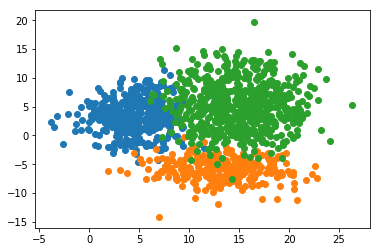

In [31]:
plt.scatter(data0[:,0], data0[:,1])
plt.scatter(data1[:,0], data1[:,1])
plt.scatter(data2[:,0], data2[:,1])

In [32]:
target0 = np.zeros(len(data0))
target1 = np.ones(len(data1))
target2 = 2*np.ones(len(data2))

In [33]:
target = np.hstack((target0, target1, target2))
data = np.vstack((data0, data1, data2))

In [34]:
mask = np.arange(len(target))
np.random.shuffle(mask)

In [35]:
data = data[mask]
target = target[mask]

In [36]:
model = KMeans(class_num=3, step_num=9, data=data)

In [37]:
model.train(data)

array([[15.55837044,  6.6173715 ],
       [13.8180371 , -4.70119157],
       [ 5.04757646,  3.32952913]])

In [38]:
pred = model.predict(data)


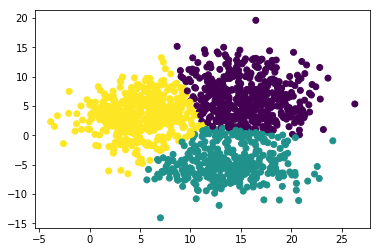

In [39]:
plt.scatter(data[:,0], data[:,1], c=pred)

In [40]:
covs = []
cov0 = np.cov(data[pred == 0].T)
cov1 = np.cov(data[pred == 1].T)
cov2 = np.cov(data[pred == 2].T)
covs = np.array([cov0, cov1, cov2])
covs

array([[[ 9.61064459, -1.38136776],
        [-1.38136776, 11.49698021]],

       [[11.11227531,  0.72363291],
        [ 0.72363291,  8.13398779]],

       [[ 7.69763848,  0.9326438 ],
        [ 0.9326438 ,  9.95442139]]])

In [41]:
model_gm = GaussMix(3, 3, 10,  model.means, covs, data)

In [42]:
model_gm.train(data)

LinAlgError: Singular matrix

In [ ]:
proba_gm = model_gm.predict_proba()

In [43]:
pred_gm = model_gm.predict()


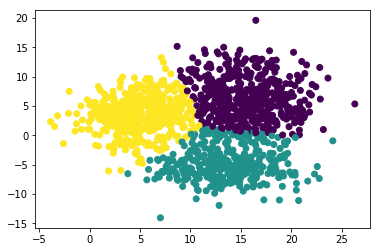

In [44]:
plt.scatter(data[:,0], data[:,1], c=pred_gm)